In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from models import LogisticGrowth, SurfaceLimitedGrowth, VonBertalanffyGrowth, GompertzGrowth, ExponentialGrowth, LinearGrowth, MendelsohnGrowth, MontrollGrowth, ExponentialDecayGrowth, AlleeEffectGrowth, LinearLimitedGrowth
import models as md
import numpy as np
from scipy.integrate import solve_ivp
from math import exp

models.py is geladen


In [2]:
ts = [0, 13, 20, 32, 42, 55, 65, 75, 85, 88, 95, 98, 107, 115, 120]
Vs = [md.GrowthModel(LinearGrowth).euler_method(t) for t in ts]
data = pd.DataFrame({'Tijd (dagen)': ts, 'Tumorvolume (mm³)': Vs})
print(data)


    Tijd (dagen)  Tumorvolume (mm³)
0              0                0.0
1             13               13.0
2             20               20.0
3             32               32.0
4             42               42.0
5             55               55.0
6             65               65.0
7             75               75.0
8             85               85.0
9             88               88.0
10            95               95.0
11            98               98.0
12           107              107.0
13           115              115.0
14           120              120.0


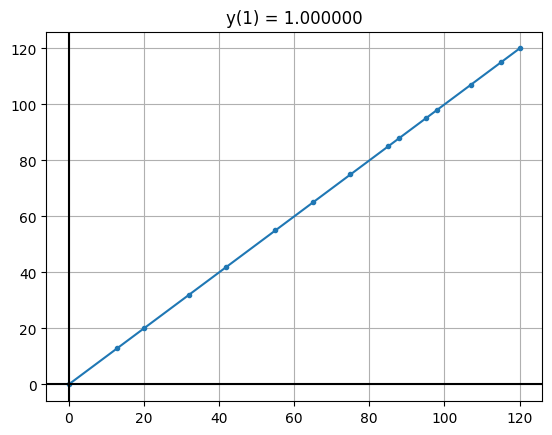

In [3]:

plt.plot(ts, Vs, '.-')
plt.axhline(0.0, color='k'); plt.axvline(0.0, color='k')
plt.grid(True)
plt.title(f'y(1) = {md.GrowthModel(LinearGrowth).euler_method(1.0):8.6f}')
plt.show()

    Tijd (dagen)  Tumorvolume (mm³)
0              0       0.000000e+00
1             13       5.906706e-10
2             20       2.552635e-09
3             32       2.990016e-08
4             42       2.219938e-07
5             55       2.841807e-06
6             65       1.931520e-05
7             75       1.267634e-04
8             85       8.032825e-04
9             88       1.385606e-03
10            95       4.861133e-03
11            98       8.261209e-03
12           107       3.782880e-02
13           115       1.254114e-01
14           120       2.402029e-01


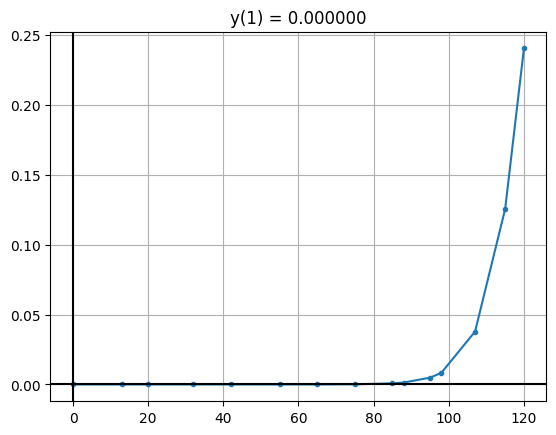

In [4]:
# SurfaceLimitedGrowth
ts = [0, 13, 20, 32, 42, 55, 65, 75, 85, 88, 95, 98, 107, 115, 120]
Vs = [md.GrowthModel(SurfaceLimitedGrowth, c=0.1, d=0.1).euler_method(t) for t in ts]
data = pd.DataFrame({'Tijd (dagen)': ts, 'Tumorvolume (mm³)': Vs})
print(data)

plt.plot(ts, Vs, '.-')
plt.axhline(0.0, color='k'); plt.axvline(0.0, color='k')
plt.grid(True)
plt.title(f'y(1) = {md.GrowthModel(SurfaceLimitedGrowth, c=0.1, d=0.1).euler_method(1.0):8.6f}')
plt.show()

    Tijd (dagen)  Tumorvolume (mm³)
0              0           0.000000
1             13           0.037837
2             20           0.101666
3             32           0.255462
4             42           0.394829
5             55           0.559056
6             65           0.663029
7             75           0.746472
8             85           0.811446
9             88           0.827782
10            95           0.860982
11            98           0.873303
12           107           0.904393
13           115           0.925811
14           120           0.936773


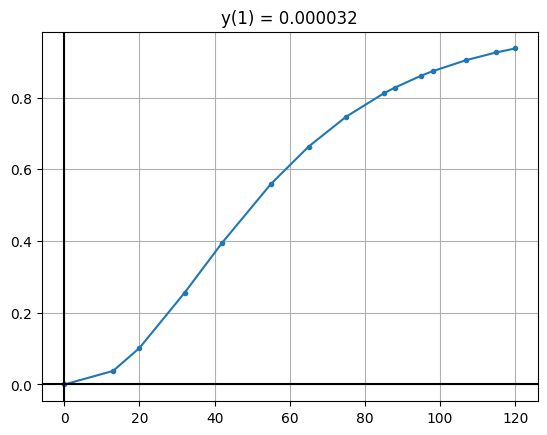

In [5]:
# VonBertalanffyGrowth
ts = [0, 13, 20, 32, 42, 55, 65, 75, 85, 88, 95, 98, 107, 115, 120]
#Vs = [250, 255, 550, 575, 576, 800, 1050, 1250, 1750, 2000, 2550, 2750, 3000, 3500, 4000]

Vs = [md.GrowthModel(VonBertalanffyGrowth, c=0.1, d=0.1).euler_method(t) for t in ts]
data = pd.DataFrame({'Tijd (dagen)': ts, 'Tumorvolume (mm³)': Vs})
print(data)

plt.plot(ts, Vs, '.-')
plt.axhline(0.0, color='k'); plt.axvline(0.0, color='k')
plt.grid(True)
plt.title(f'y(1) = {md.GrowthModel(VonBertalanffyGrowth, c=0.1, d=0.1).euler_method(1.0):8.6f}')
plt.show()

    Tijd (dagen)  Tumorvolume (mm³)
0              0           0.000000
1             13           0.000755
2             20           0.021325
3             32           0.271395
4             42           0.593467
5             55           0.857233
6             65           0.942408
7             75           0.977691
8             85           0.991556
9             88           0.993712
10            95           0.996855
11            98           0.997668
12           107           0.999056
13           115           0.999581
14           120           0.999749


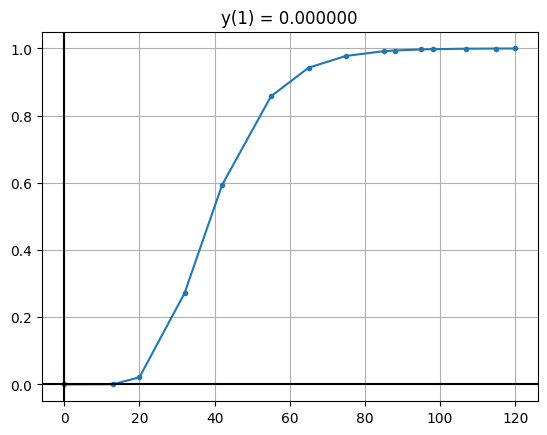

In [6]:
# GompertzGrowth

ts = [0, 13, 20, 32, 42, 55, 65, 75, 85, 88, 95, 98, 107, 115, 120]
#Vs = [250, 255, 550, 575, 576, 800, 1050, 1250, 1750, 2000, 2550, 2750, 3000, 3500, 4000]

Vs = [md.GrowthModel(GompertzGrowth, c=0.1, d=0.1).euler_method(t) for t in ts]
data = pd.DataFrame({'Tijd (dagen)': ts, 'Tumorvolume (mm³)': Vs})
print(data)

plt.plot(ts, Vs, '.-')
plt.axhline(0.0, color='k'); plt.axvline(0.0, color='k')
plt.grid(True)
plt.title(f'y(1) = {md.GrowthModel(GompertzGrowth, c=0.1, d=0.1).euler_method(1.0):8.6f}')
plt.show()

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from models import LogisticGrowth, SurfaceLimitedGrowth, VonBertalanffyGrowth, GompertzGrowth, ExponentialGrowth, LinearGrowth, MendelsohnGrowth, MontrollGrowth, ExponentialDecayGrowth, AlleeEffectGrowth, LinearLimitedGrowth,LinearGrowth_test
import models as md
import numpy as np
from scipy.integrate import solve_ivp
from math import exp

ts = [0, 13, 20, 32, 42, 55, 65, 75, 85, 88, 95, 98, 107, 115, 120]
Vs = [md.GrowthModel(LinearGrowth).euler_method(t) for t in ts]
data = pd.DataFrame({'Tijd (dagen)': ts, 'Tumorvolume (mm³)': Vs})
print(data)

    Tijd (dagen)  Tumorvolume (mm³)
0              0                0.0
1             13               13.0
2             20               20.0
3             32               32.0
4             42               42.0
5             55               55.0
6             65               65.0
7             75               75.0
8             85               85.0
9             88               88.0
10            95               95.0
11            98               98.0
12           107              107.0
13           115              115.0
14           120              120.0


In [14]:
params = {
    'd':  0.0,
    'c': 0.0,
    'V0': 0.0,
    'Vmax': 0.0,
    'Vmin': 0.0,
} 
# Vmin, Vmax

new_params = md.GrowthModel(LinearGrowth_test).best_params(ts, Vs, params)

new_params

{'d': 0.0, 'c': 0.0, 'V0': 0.0, 'Vmax': 0.0, 'Vmin': 0.0}


{'d': 0.0, 'c': 1.0, 'V0': 0.0, 'Vmax': 0.0, 'Vmin': -7.450580596923828e-09}

In [9]:
# eigen gemaakt van internet

In [10]:
# eigen gemaakt van internet

In [11]:
# eigen gemaakt van internet

In [12]:
# eigen gemaakt van internet